In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

In [2]:
import numpy as np
from sklearn.datasets import make_moons

def make_moons_random_assignment(n_samples, n_new_dims=0, seed=0):
    np.random.seed(seed)
    X, l = make_moons(n_samples=n_samples, random_state=seed, noise=0.0)
    X = np.hstack((X, np.zeros((len(X), n_new_dims))))
    return X, l


np.random.seed(0)
random_seeds = np.random.choice(1_000_000, replace=False, size=10)
n_dims = list(range(2, 11, 1))
twoMoons_datasets = [
    [make_moons_random_assignment(500, n_new_dims=n_dim-2, seed=seed) for seed in random_seeds]
    for n_dim in n_dims
]

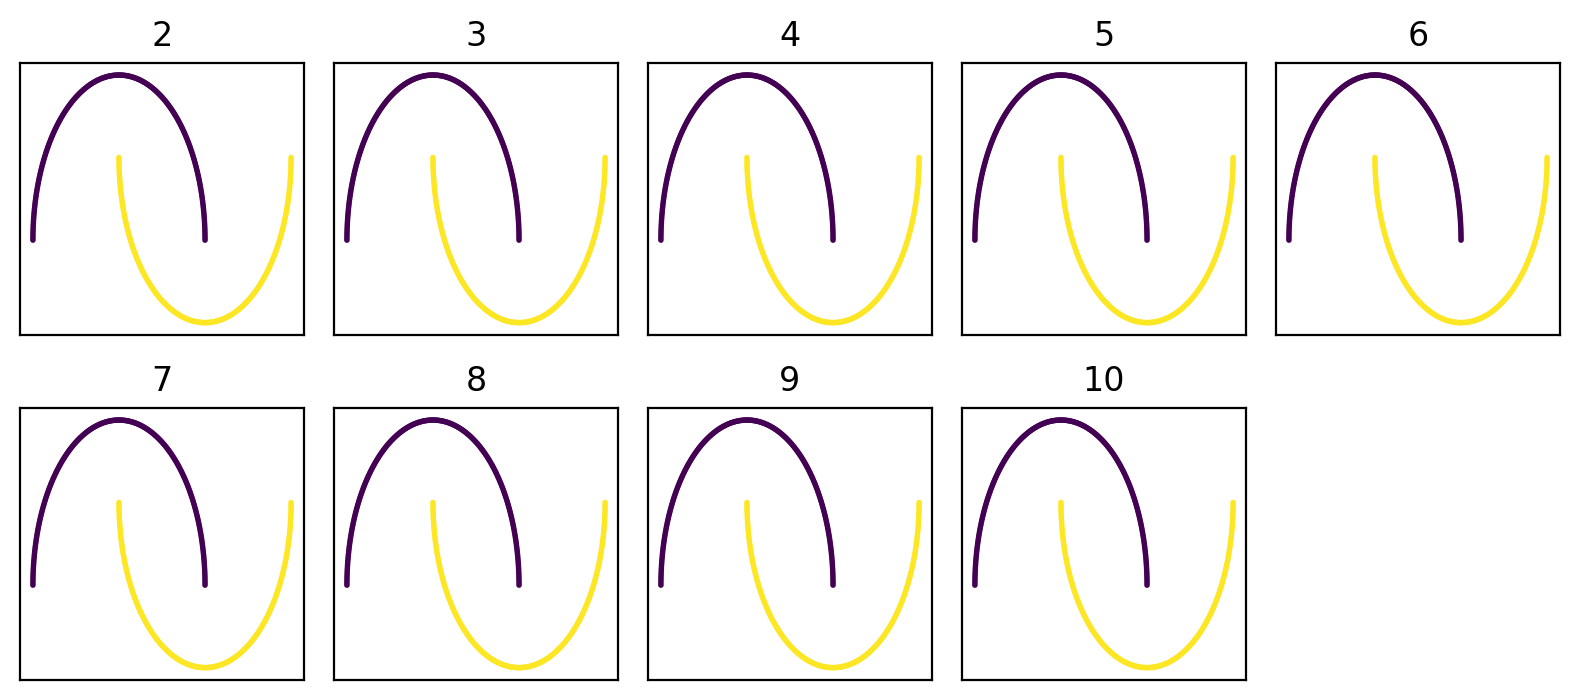

In [7]:
import matplotlib.pyplot as plt
from src.utils.plots import plot_datasets

plot_datasets(twoMoons_datasets, n_dims, n_cols=5, figsize=1.6)
plt.savefig("imgs/TwoMoons_dims_data.png")

In [4]:
from src.utils.experiments import cache, calc_eval_measures_for_multiple_datasets
from src.utils.metrics import create_and_rescale_df


eval_results = cache(
    "TwoMoons_dims",
    calc_eval_measures_for_multiple_datasets,
    [twoMoons_datasets, n_dims],
    recalc=False,
)

df = create_and_rescale_df(eval_results)

In [5]:
df = df.rename(columns={"dataset": "n_dims"})
df[(df.measure == "DBCV") & (df.n_dims == 4)]

,n_dims,measure,run,value,time,process_time
281,4,DBCV,0,0.461556,0.163014,0.066226
295,4,DBCV,1,0.461556,0.097555,0.064180
309,4,DBCV,2,0.461556,0.109296,0.062992
323,4,DBCV,3,0.461556,0.143478,0.066277
337,4,DBCV,4,0.461556,0.121666,0.063999
351,4,DBCV,5,0.461556,0.061609,0.060529
365,4,DBCV,6,0.461556,0.111658,0.058988
379,4,DBCV,7,0.461556,0.081926,0.065455
393,4,DBCV,8,0.461556,0.112784,0.067543
407,4,DBCV,9,0.461556,0.074668,0.065846


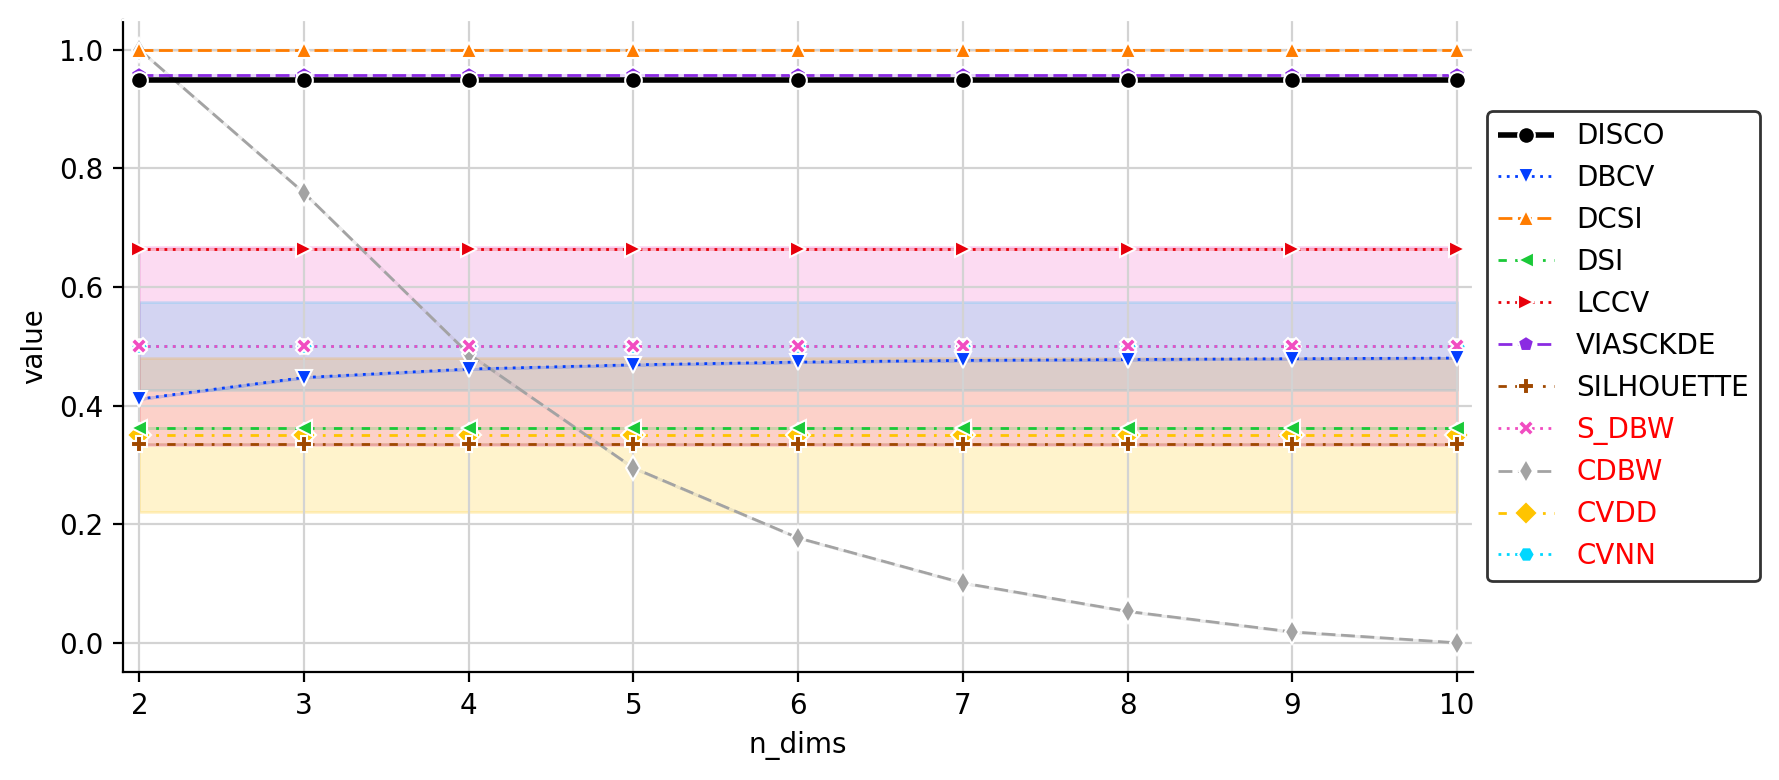

In [6]:
from src.utils.plots import plot_lineplot

eps = 0.1
x_range = n_dims[0] - eps, n_dims[-1] + eps
# df = df.rename(columns={"dataset": "n_dims"})

plot_lineplot(df, "n_dims", "value", "measure", x_range=x_range, y_range=(None, None))
plt.savefig("imgs/TwoMoons_dims.png")